# Investigation of the AT composition of sequences by the sliding window method

##### Download packages and install configurations

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import seaborn as sns
import pandas as pd

In [43]:
plt.rcParams["figure.figsize"] = 12, 9
PATH_TO_sequence_txt = r"sequence.txt" # ADD YOUR path to sequence.txt file 
#(file obtained from the annotation by filtering gene-coding sequences)

> get_hub_genes_list() - the function transforms the names of the genes into the required format

> list_at() - the function uses a dictionary with sequences for the transmitted gene names to calculate the AT composition for each gene

In [4]:
def get_hub_genes_list(path_to_hub_genes_file:str):
    hub = []
    with open(path_to_hub_genes_file, "r") as file:
        for line in file:
            hub.append(line.strip())
    hub = hub[1:]
    hub = list(map(lambda x: x.split('\t')[1], hub))
    hub_genes_list = list(map(lambda x: x.split('-')[1], hub))
    return hub_genes_list

In [5]:
def list_at(hub_genes_list:list, fasta:dict):
    hub_seq = list(map(lambda x: fasta[x], hub_genes_list))
    return np.array(list(map(lambda x: (x.count('A')+x.count('T'))/(len(x)), hub_seq)))

##### Let's create a dictionary with sequences (information about the sequence is taken from the GFF3 file)

In [42]:
# lists of IDs and seqs
id_seq = []
seq = []
stroka = str()
with open(PATH_TO_sequence_txt, "r") as file:
    id_seq.append(file.readline().strip())
    for line in file:
        if line.startswith('>'):
            seq.append(stroka)
            id_seq.append(line.strip())
            stroka = str()
        else:
            stroka += line.strip()
seq.append(stroka)
# transform id
id_seq_2 = list(map(lambda x: x.split('locus_tag=')[1], id_seq))
id_seq_2 = list(map(lambda x: x.split(']')[0], id_seq_2))
# fasta-dict
fasta = dict(zip(id_seq_2, seq))

In [30]:
def mean_at(hub_genes_list:list, fasta:dict):
    hub_seq = list(map(lambda x: fasta[x], hub_genes_list))
    return np.mean(np.array(list(map(lambda x: (x.count('A')+x.count('T'))/(len(x)), hub_seq))))

### Let's carry out a statistical analysis of the AT composition between the groups of modules "Treated" and "Time"

*All *\_hub.txt files are received at the previous stages of analysis (see snakemake)*

#### Black hub stats

In [31]:
print("Hub AT-mean: ", mean_at(get_hub_genes_list("black_hub.txt"), fasta))
bhs = list_at(get_hub_genes_list("black_hub.txt"), fasta)
bhs

Hub AT-mean:  0.4980507988045392


array([0.49354005, 0.45449275, 0.4373673 , 0.4956427 , 0.4627193 ,
       0.4497992 , 0.5       , 0.5030303 , 0.43839542, 0.57509158,
       0.59101655, 0.53333333, 0.46335697, 0.4829932 , 0.48309179,
       0.50537634, 0.44557823, 0.45586298, 0.60406886, 0.57509953,
       0.57187994, 0.49318801, 0.5625    , 0.62686567, 0.46818182,
       0.48210291, 0.4352483 , 0.4510451 , 0.45050505, 0.44572897,
       0.64473684, 0.48858447, 0.48611111, 0.46984127, 0.46747967,
       0.46867168, 0.48557214, 0.49      , 0.48858447, 0.48794326,
       0.54714475, 0.45636172])

#### Yellow hub stats

In [32]:
print("Hub AT-mean: ", mean_at(get_hub_genes_list("yellow_hub.txt"), fasta))
yhs = list_at(get_hub_genes_list("yellow_hub.txt"), fasta)
yhs

Hub AT-mean:  0.5148635083663371


array([0.4416492 , 0.46016771, 0.5942029 , 0.61936937, 0.53809524,
       0.45609946, 0.47225752, 0.43242172, 0.4754717 , 0.5       ,
       0.39673913, 0.56283069, 0.59772423, 0.56884058, 0.5061082 ,
       0.50155763, 0.45683931, 0.52759382, 0.65207632, 0.53333333,
       0.48275862, 0.4499484 , 0.64948454, 0.47424242, 0.49023438,
       0.45492662, 0.43333333, 0.53703704, 0.55153949, 0.50171821,
       0.60367454, 0.58024691, 0.55135659, 0.57837838, 0.60043668,
       0.48290598, 0.49915398, 0.52962963, 0.61295419, 0.58797814,
       0.58103976, 0.55603448, 0.66478343, 0.69064192, 0.49666667,
       0.55985267, 0.49166667, 0.45550528, 0.46846847, 0.59360731,
       0.44444444, 0.5236246 , 0.46769231, 0.46391753, 0.58447489,
       0.46525324, 0.49242424, 0.46418338, 0.48446328, 0.45679012,
       0.52604167, 0.46666667, 0.44510978, 0.48356808, 0.50318471,
       0.4957265 , 0.45147679, 0.49084249, 0.48858447, 0.45318352,
       0.45402299, 0.45402299, 0.4256651 , 0.44913268, 0.46113

#### Green hub stats

In [33]:
print("Hub AT-mean: ", mean_at(get_hub_genes_list("green_hub.txt"), fasta))
ghs = list_at(get_hub_genes_list("green_hub.txt"), fasta)
ghs

Hub AT-mean:  0.470653555754817


array([0.47590361, 0.53608247, 0.45658263, 0.48598131, 0.40902475,
       0.48384728, 0.45844504, 0.4840484 , 0.49275362, 0.50645995,
       0.41509434, 0.43478261, 0.47940075, 0.45614035, 0.51785714,
       0.49739583, 0.47798742, 0.42990111, 0.49203822, 0.46268657,
       0.46428571, 0.47058824, 0.43565891, 0.40286299, 0.44771242,
       0.46579805, 0.52192982, 0.4321608 , 0.53549383, 0.52302026,
       0.472     , 0.58706468, 0.46279762, 0.56810036, 0.48174048,
       0.49302326, 0.4203869 , 0.43765281, 0.44927536, 0.40027045,
       0.43824405, 0.41898865, 0.54003724, 0.45644599, 0.51202749,
       0.42872454, 0.4796748 , 0.47379032, 0.47389558, 0.46226415,
       0.42915643, 0.43013972, 0.43309002, 0.51325758, 0.4837963 ,
       0.49305556, 0.53003003, 0.48521916, 0.4962963 , 0.44414656,
       0.42809808, 0.45684524, 0.54978355, 0.50163079, 0.50724638,
       0.48945148, 0.48781676, 0.46610169, 0.47785548, 0.47468354,
       0.45895522, 0.42350557, 0.50806452, 0.48619529, 0.52192

#### Red hub stats

In [34]:
print("Hub AT-mean: ", mean_at(get_hub_genes_list("red_hub.txt"), fasta))
rhs = list_at(get_hub_genes_list("red_hub.txt"), fasta)
rhs

Hub AT-mean:  0.4892495954985648


array([0.45855379, 0.53409091, 0.43237487, 0.41414141, 0.48924731,
       0.45258871, 0.46052632, 0.45400433, 0.45647558, 0.43456033,
       0.47575058, 0.44536653, 0.47524752, 0.4244186 , 0.44212156,
       0.46582734, 0.5320715 , 0.47245883, 0.4969697 , 0.446875  ,
       0.48275862, 0.43925234, 0.45709124, 0.59300184, 0.66503268,
       0.49507517, 0.52486188, 0.46450617, 0.47798742, 0.47987118,
       0.58730159, 0.50987654, 0.47252747, 0.48985507, 0.49444444,
       0.48267448, 0.43372814, 0.56459948, 0.59516616, 0.59782609,
       0.54379977, 0.45231072, 0.4921466 , 0.4673913 , 0.46630237,
       0.46838156, 0.4470339 , 0.43764706, 0.479006  , 0.47111111,
       0.66408269, 0.66365008, 0.47831978, 0.68864469, 0.63341646,
       0.59074074, 0.46285714, 0.42708333, 0.42475387, 0.46744186,
       0.48050314, 0.46041856, 0.45238095, 0.48148148, 0.50387597,
       0.50961538, 0.43962115, 0.48321513, 0.50318471, 0.46218487,
       0.41860465, 0.52697095, 0.44135189, 0.42215855, 0.44654

#### Brown hub stats

In [35]:
print("Hub AT-mean: ", mean_at(get_hub_genes_list("brown_hub.txt"), fasta))
brhs = list_at(get_hub_genes_list("brown_hub.txt"), fasta)
brhs

Hub AT-mean:  0.5162286098943277


array([0.48904762, 0.47029703, 0.41042113, 0.44047619, 0.45165394,
       0.45552785, 0.3953602 , 0.6803653 , 0.5711501 , 0.5203252 ,
       0.48418491, 0.50925926, 0.48579545, 0.43248014, 0.44878049,
       0.52801519, 0.45769231, 0.43356643, 0.57142857, 0.4859353 ,
       0.58666667, 0.60280374, 0.64888889, 0.50555556, 0.51086957,
       0.52284264, 0.52511416, 0.47586727, 0.47033898, 0.62876254,
       0.64109347, 0.44658754, 0.50617284, 0.44348541, 0.56103286,
       0.46766169, 0.56924148, 0.59459459, 0.47761194, 0.53634085,
       0.49411765, 0.60616438, 0.54709419, 0.45736434, 0.58232932,
       0.52612613, 0.40331492, 0.44117647, 0.60202788, 0.48993289,
       0.61025641, 0.60339943, 0.55371901, 0.44545455, 0.61481481,
       0.4198895 , 0.60798696, 0.51168831, 0.5944645 , 0.48461926,
       0.61699651, 0.47686833, 0.44117647, 0.51804671, 0.55955441,
       0.62846227, 0.54216867, 0.5008726 , 0.47071353, 0.53674121,
       0.61515152, 0.53030303, 0.51089325, 0.53467001, 0.52158

#### Blue  hub stats

In [36]:
print("Hub AT-mean: ", mean_at(get_hub_genes_list("blue_hub.txt"), fasta))
blhs = list_at(get_hub_genes_list("blue_hub.txt"), fasta)
blhs

Hub AT-mean:  0.45847926679582846


array([0.4464752 , 0.40892193, 0.41949153, 0.42058166, 0.45497076,
       0.42676768, 0.425     , 0.40671351, 0.48748353, 0.47202797,
       0.48050682, 0.47587719, 0.46514575, 0.44299391, 0.49786325,
       0.44293478, 0.4372502 , 0.47619048, 0.4683908 , 0.45426357,
       0.46666667, 0.39803922, 0.46810036, 0.45083014, 0.50490196,
       0.39441536, 0.45924132, 0.41452991, 0.48051948, 0.5       ,
       0.38157895, 0.5       , 0.5       , 0.5       , 0.45307443,
       0.44625407, 0.45852187, 0.44297082, 0.45167653, 0.51141553,
       0.52742616, 0.400818  , 0.46222222, 0.46628131, 0.46507666,
       0.45792079, 0.44235925, 0.48461538, 0.50810185, 0.50483729,
       0.40672783, 0.45419103, 0.45180023, 0.46560847, 0.45091694,
       0.49678604, 0.44619423, 0.46519411, 0.47430025, 0.4957265 ,
       0.44392765, 0.49667995, 0.5351682 , 0.43495935, 0.45771144,
       0.4382716 , 0.52857143, 0.4862069 , 0.4691358 , 0.46357616,
       0.52380952, 0.45521292, 0.49305556, 0.47093713, 0.45856

#### Turquoise hub stats

In [37]:
print("Hub AT-mean: ", mean_at(get_hub_genes_list("turquoise_hub.txt"), fasta))
ths = list_at(get_hub_genes_list("turquoise_hub.txt"), fasta)
ths

Hub AT-mean:  0.47753037393293746


array([0.45392157, 0.51515152, 0.41814278, 0.4683908 , 0.45645646,
       0.44444444, 0.42325387, 0.45784695, 0.53229974, 0.48085901,
       0.47692308, 0.40180467, 0.5       , 0.44586895, 0.44906034,
       0.45454545, 0.55797101, 0.47222222, 0.43076923, 0.52882206,
       0.45964912, 0.50381679, 0.44342973, 0.43019943, 0.47474747,
       0.4214876 , 0.48018648, 0.45682002, 0.48071625, 0.46222222,
       0.43037975, 0.44315545, 0.46285714, 0.49305556, 0.45047923,
       0.44277108, 0.44444444, 0.50212766, 0.4517134 , 0.45652174,
       0.47717842, 0.46718648, 0.45385451, 0.46051538, 0.45919779,
       0.42434988, 0.48224044, 0.49203822, 0.46165192, 0.48313622,
       0.43051031, 0.48901099, 0.47927461, 0.46881497, 0.45868946,
       0.44202899, 0.64485981, 0.56140351, 0.52965599, 0.43565891,
       0.46126761, 0.4691358 , 0.47390841, 0.4321608 , 0.45990722,
       0.53477868, 0.47368421, 0.47733333, 0.49652778, 0.4525802 ,
       0.45440613, 0.47804878, 0.46329723, 0.49760413, 0.51675

### Now you can copy the output arrays for further statistical processing.

Step 1. Copy the derived matrices for further processing.
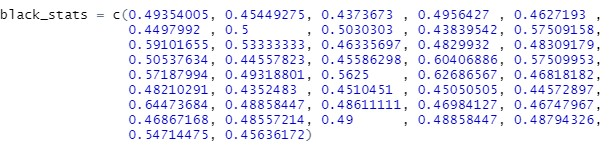

Step 2. Combine the "Treated" and "Time" modules into two groups.
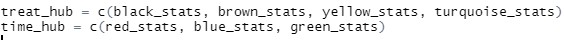

Step 3. Check the distribution of variables. In our case, the variables are distributed significantly differently from the normal distribution.
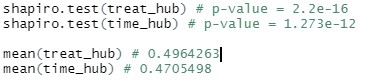

Step 4. We use a nonparametric test to test the hypothesis. The variables are significantly different, therefore, the AT composition in these groups of genes is different.


### Sliding window for AT composition

Let us compare the average AT composition by positions in the initial region (the first 300 nucleotides) of the studied genes in order to identify deviations in the AT composition, which presumably distinguishes genes sensitive to DNA supercoiling. We use the sliding window method: a "window" of 30 nucleotides in length is iteratively advanced by one nucleotide to a length of 300 nucleotides (the initial sections of the sequence under study). Within the window, at each iteration, the AT composition is calculated. The obtained arrays are averaged for all genes of modules - a spectrum of the AT composition is obtained. The resulting spectra are drawn and compared for different modules.

##### Let's check the visualization on three genes

In [36]:
seq_one = fasta["STM14_RS00590"]
seq_two = fasta["STM14_RS01180"]
seq_three = fasta["STM14_RS07815"]

In [37]:
len(seq_one), len(seq_two),len(seq_three)

(774, 942, 2763)

In [10]:
prom_size = 30
scan_area = 300

In [11]:
def scan_at(seq:str, prom_size=30, scan_area=300):
    scan_list = []
    for i in range(scan_area):
        area = seq[i:prom_size+i]
        scan_list.append((area.count('A')+area.count('T'))/30)
    return scan_list

In [40]:
one = scan_at(seq_one)
two = scan_at(seq_two)
three = scan_at(seq_three)

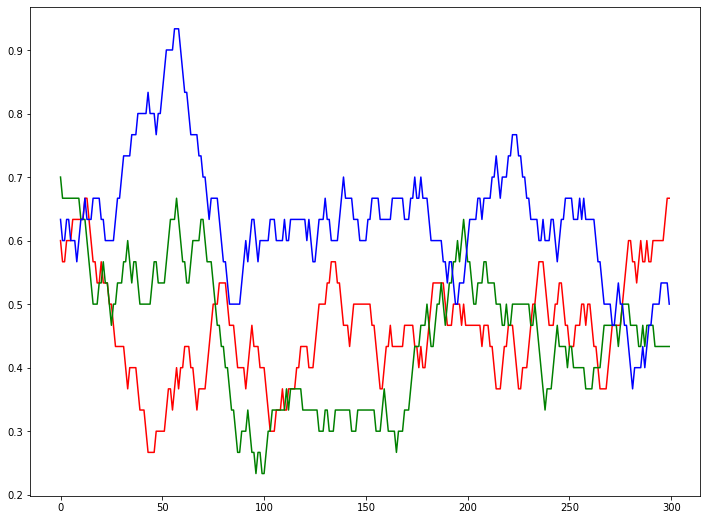

In [64]:
plt.plot(one, color="r")
plt.plot(two, color="g")
plt.plot(three, color="b")

#### Let's sequentially check for the hub genes lists of the "Treated" modules (obtained at the previous stages of the analysis)

In [7]:
black_hub = []
with open("black_hub.txt", "r") as file:
    for line in file:
        black_hub.append(line.strip())
black_hub = black_hub[1:]

In [8]:
black_hub = list(map(lambda x: x.split('\t')[1], black_hub))

In [12]:
matrix_hub = []
for gene in list(map(lambda x: x.split('-')[1], black_hub)):
    matrix_hub.append(scan_at(fasta[gene]))

In [13]:
matrix_hub = np.array(matrix_hub)

In [17]:
np.mean(matrix_hub, axis=0)

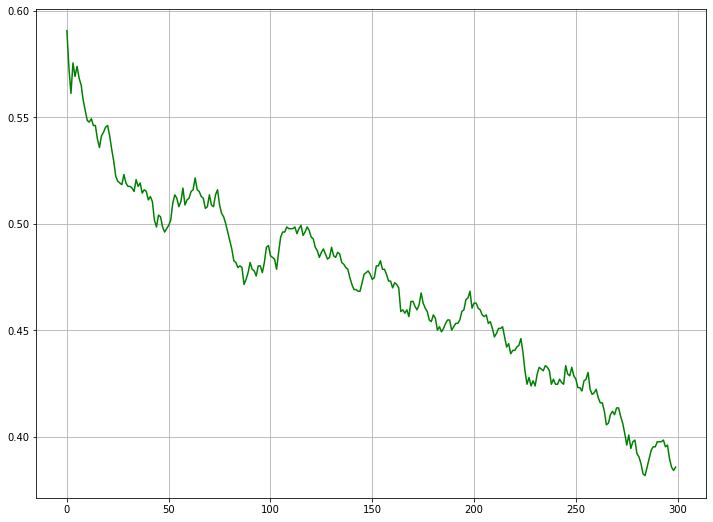

In [18]:
plt.plot(np.mean(matrix_hub, axis=0), color="g")
plt.grid()

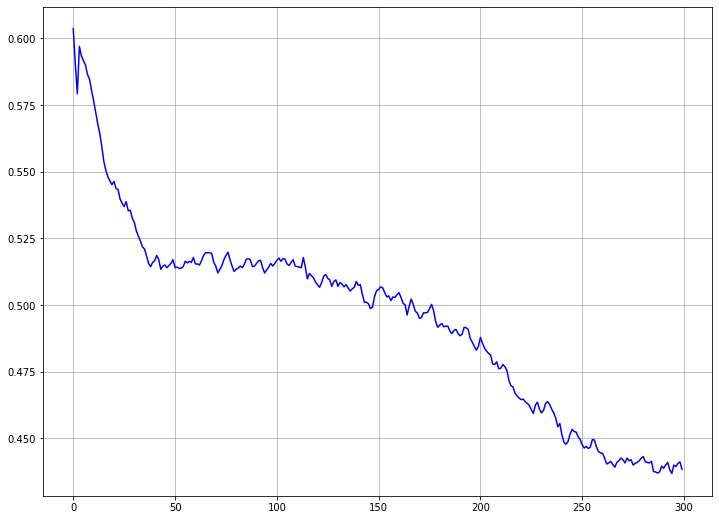

In [19]:
brown_hub = []
with open("brown_hub.txt", "r") as file:
    for line in file:
        brown_hub.append(line.strip())
brown_hub = brown_hub[1:]

brown_hub = list(map(lambda x: x.split('\t')[1], brown_hub))

brown_matrix = []
for gene in list(map(lambda x: x.split('-')[1], brown_hub)):
    brown_matrix.append(scan_at(fasta[gene]))
    
brown_matrix = np.array(brown_matrix)

plt.plot(np.mean(brown_matrix, axis=0), color="b")
plt.grid()

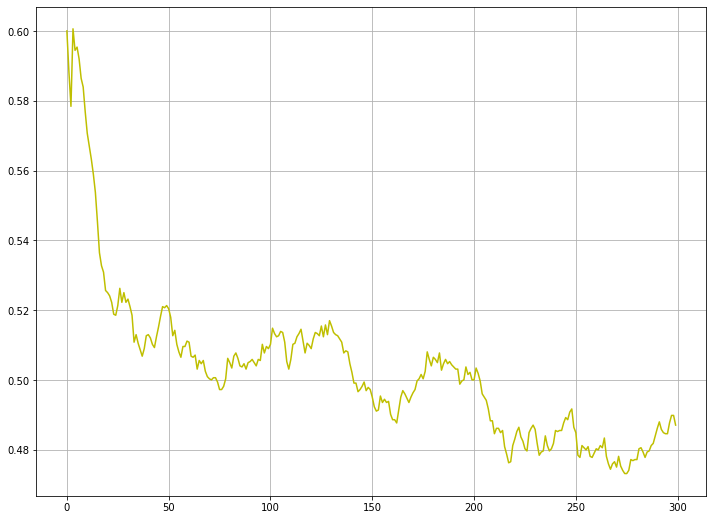

In [20]:
yellow_hub = []
with open("yellow_hub.txt", "r") as file:
    for line in file:
        yellow_hub.append(line.strip())
yellow_hub = yellow_hub[1:]

yellow_hub = list(map(lambda x: x.split('\t')[1], yellow_hub))

yellow_matrix = []
for gene in list(map(lambda x: x.split('-')[1], yellow_hub)):
    yellow_matrix.append(scan_at(fasta[gene]))
    
yellow_matrix = np.array(yellow_matrix)

plt.plot(np.mean(yellow_matrix, axis=0), color="y")
plt.grid()

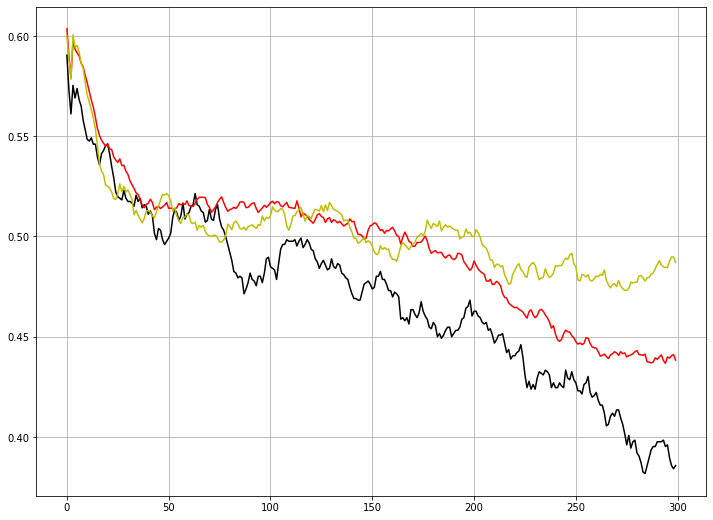

In [21]:
plt.plot(np.mean(matrix_hub, axis=0), color="k")
plt.plot(np.mean(brown_matrix, axis=0), color="r")
plt.plot(np.mean(yellow_matrix, axis=0), color="y")
plt.grid()

##### Function for preparing lists of modules

In [22]:
def mod_matrix(path_to_hub):
    hub = []
    with open(path_to_hub, "r") as file:
        for line in file:
            hub.append(line.strip())
    hub = hub[1:]
    hub = list(map(lambda x: x.split('\t')[1], hub))

    matrix = []
    for gene in list(map(lambda x: x.split('-')[1], hub)):
        matrix.append(scan_at(fasta[gene]))
    matrix = np.array(matrix)
    return matrix

In [23]:
tur_matrix = mod_matrix("turquoise_hub.txt")
red_matrix = mod_matrix("red_hub.txt")
blue_matrix = mod_matrix("blue_hub.txt")
green_matrix =mod_matrix("green_hub.txt")

##### Draw the frequency spectra for all modules

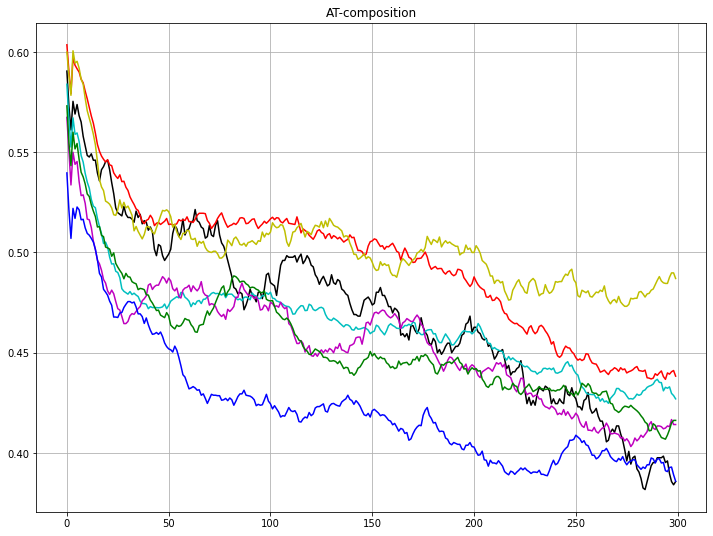

In [24]:
plt.plot(np.mean(matrix_hub, axis=0), color="k")
plt.plot(np.mean(brown_matrix, axis=0), color="r")
plt.plot(np.mean(yellow_matrix, axis=0), color="y")

plt.plot(np.mean(tur_matrix, axis=0), color="c")
plt.plot(np.mean(red_matrix, axis=0), color="m")
plt.plot(np.mean(blue_matrix, axis=0), color="b")
plt.plot(np.mean(green_matrix, axis=0), color="g")
plt.title("AT-composition")
plt.grid()

##### Let's designate in blue the positive modules "Treated", in blue the negative module "Treated", in purple the modules "Time"

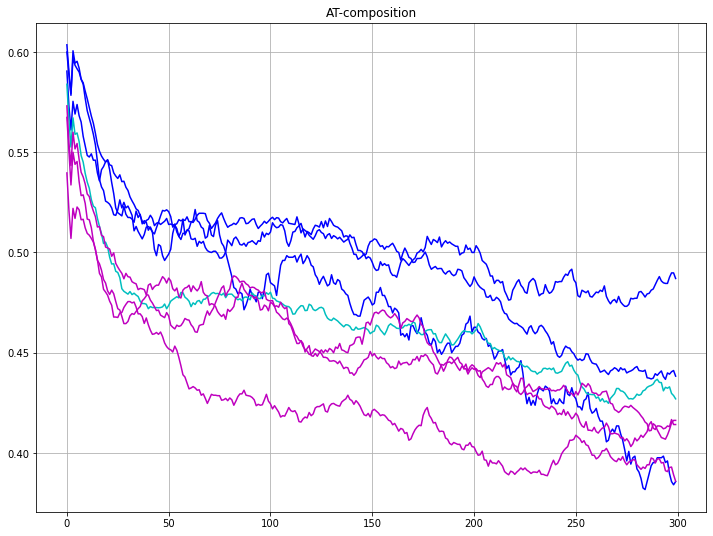

In [26]:
plt.plot(np.mean(matrix_hub, axis=0), color="b")
plt.plot(np.mean(brown_matrix, axis=0), color="b")
plt.plot(np.mean(yellow_matrix, axis=0), color="b")

plt.plot(np.mean(tur_matrix, axis=0), color="c")
plt.plot(np.mean(red_matrix, axis=0), color="m")
plt.plot(np.mean(blue_matrix, axis=0), color="m")
plt.plot(np.mean(green_matrix, axis=0), color="m")
plt.title("AT-composition")
plt.grid()

##### Let's average the results for positive "Treated" modules, "Time" modules and compare

In [85]:
novo = [matrix_hub, brown_matrix, yellow_matrix]
novo = np.array(list(map(lambda x: np.mean(x, axis=0), novo)))
wt = [red_matrix, blue_matrix, green_matrix]
wt = np.array(list(map(lambda x: np.mean(x, axis=0), wt)))

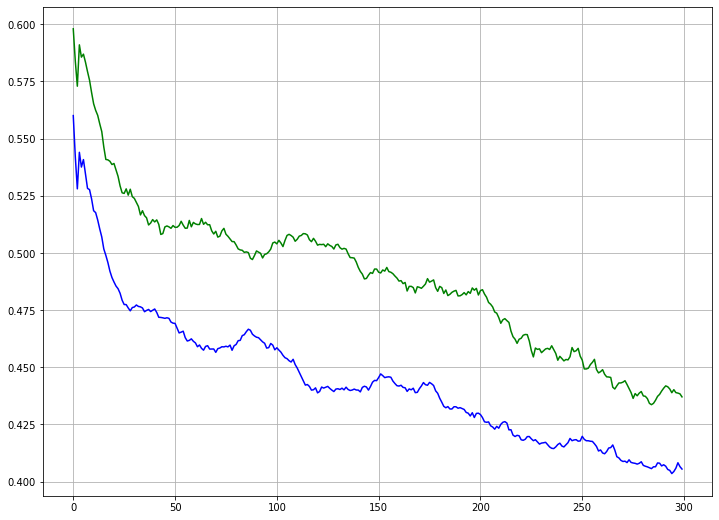

In [87]:
plt.plot(np.mean(novo, axis=0), color="g")
plt.plot(np.mean(wt, axis=0), color="b")
plt.grid()

### Thus, the AT composition is higher in genes that are characterized by a positive response to novobiocin.